In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
LABEL_TRANSLATION={0: 'plane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
def plot_dataset_samples_grid(image_data, dataset_name='', N=8):
  """
    Эта функция строит NxN самплов из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Size of grid of samples 
  """
  plt.figure(figsize=(10,10))
  data1=image_data[:N*N]
  
  image_width=image_data.shape[1]
  image_heigth=image_data.shape[2]

  if len(data1.shape)==4:
    image_channels=image_data.shape[3]
    data1 = data1.reshape(N, N,image_width,image_heigth, image_channels)
    data1 = np.transpose(data1,(0,2,1,3,4))
    data1 = data1.reshape(N*image_width,N*image_heigth,image_channels)
    plt.imshow(data1)

  elif len(data1.shape)==3:
    data1 = data1.reshape(N, N,image_width,image_heigth)
    data1 = np.transpose(data1,(0,2,1,3))
    data1 = data1.reshape(N*image_width,N*image_heigth)
    plt.imshow(data1,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('First '+ str(N*N) + ' '+dataset_name+ ' samples of training set')
  plt.show()

In [5]:
X_train = X_train / 255 
X_test = X_test / 255

y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [22]:
def define_model():
  # Создаем пустую модель
  model = Sequential()

#VGG1-блок
  # Начинаем со сверточного слоя, указывая тип активации на выходе из него,
  # способ заполнения краев (padding) и способ инициализации весов
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  # Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
  # выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
  model.add(MaxPooling2D((2, 2)))

  # Слой dropout, который на каждом шаге "выключает" 20% случайно выбранных нейронов
  model.add(Dropout(0.2))

#VGG2-блок
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
#VGG3-блок
  #model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #model.add(MaxPooling2D((3, 3)))
#VGG4-блок
  #model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))

  # Разворачиваем данные в вектор
  model.add(Flatten())
  # Добавляем полносвязные слои:
  # ReLU активация скрытого слоя
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  # Знакомый нам softmax для выходного полносвязного слоя
  model.add(Dense(10, activation='softmax'))

  # Компилируем модель с функцией ошибки categorical crossentropy, оптимизатором Адам 
  # (оптимизатор, который со стандартным набором параметров может обучить эффективную
  # нейросеть), и метрикой - количеством правильно угаданных картинок.
  model.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])
  return model

In [7]:
base_model = define_model()

In [8]:
history_cnn = base_model.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
391/391 [==============================] - 16s 15ms/step - loss: 1.6594 - accuracy: 0.3946 - val_loss: 1.3088 - val_accuracy: 0.5290
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.2325 - accuracy: 0.5598 - val_loss: 1.0861 - val_accuracy: 0.6159
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0724 - accuracy: 0.6206 - val_loss: 0.9349 - val_accuracy: 0.6734
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.9596 - accuracy: 0.6603 - val_loss: 0.8873 - val_accuracy: 0.6840
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.8858 - accuracy: 0.6877 - val_loss: 0.8309 - val_accuracy: 0.7096
Epoch 6/10
391/391 [==============================] - 5s 14ms/step - loss: 0.8266 - accuracy: 0.7068 - val_loss: 0.8022 - val_accuracy: 0.7181
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.7844 - accuracy: 0.7243 - val_loss: 0.7713 - val_accuracy: 0.725

313/313 [==============================] - 1s 4ms/step - loss: 0.7206 - accuracy: 0.7491


[0.7205693125724792, 0.7491000294685364]

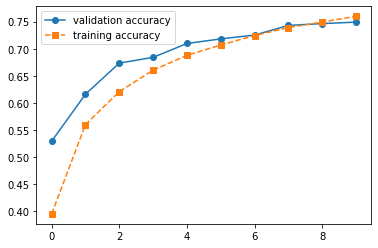

In [9]:
plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
plt.legend();
base_model.evaluate(X_test, y_test)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.2, 
    zoom_range = 0.01,
    shear_range=0.02)
train_generator = datagen.flow(X_train, y_train, batch_size=128)

In [30]:
gen_model = define_model()

In [31]:
history_cnn = gen_model.fit_generator(train_generator,
                        epochs=40,
                        validation_data=(X_test, y_test))

Epoch 1/40
391/391 [==============================] - 32s 76ms/step - loss: 1.8070 - accuracy: 0.3361 - val_loss: 1.5390 - val_accuracy: 0.4538
Epoch 2/40
391/391 [==============================] - 29s 73ms/step - loss: 1.4058 - accuracy: 0.4906 - val_loss: 1.1792 - val_accuracy: 0.5834
Epoch 3/40
391/391 [==============================] - 27s 68ms/step - loss: 1.2547 - accuracy: 0.5501 - val_loss: 1.0771 - val_accuracy: 0.6199
Epoch 4/40
391/391 [==============================] - 27s 70ms/step - loss: 1.1458 - accuracy: 0.5902 - val_loss: 1.0473 - val_accuracy: 0.6297
Epoch 5/40
391/391 [==============================] - 27s 69ms/step - loss: 1.0608 - accuracy: 0.6214 - val_loss: 0.9165 - val_accuracy: 0.6768
Epoch 6/40
391/391 [==============================] - 27s 69ms/step - loss: 1.0015 - accuracy: 0.6450 - val_loss: 0.8458 - val_accuracy: 0.7016
Epoch 7/40
391/391 [==============================] - 27s 70ms/step - loss: 0.9503 - accuracy: 0.6622 - val_loss: 0.8298 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.6449 - accuracy: 0.7891


[0.6449304819107056, 0.7890999913215637]

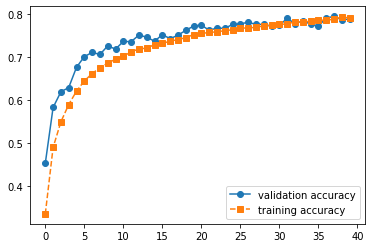

In [32]:
plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
plt.legend();
gen_model.evaluate(X_test, y_test)